<a href="https://colab.research.google.com/github/soulayman-al-abdallah/ML-Petro-well-log-lithology/blob/main/2_Regression_modeling_NPHI_log.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

After preparing the dataframes **litho_code & df_main** in part 1, one of the available logs has a huge number of missing values, far from other logs features.

In this notebook, we will choose the right model (RandomForestRegressor) to **predict NPHI** column's **missing values**, in the **df_main** dataframe.

We end up with a final **total_df** with filled values of NPHI log column.



---



---



---



# Importing Modules and DataFrame


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from collections import Counter
import time
import multiprocessing
from collections import Counter

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:

df_main = pd.read_csv('/content/gdrive/MyDrive/Dev tools/Data - NorthSea Electrofacies/Generated Dataframes/df_main.csv.gz', compression='gzip')
df_main

,DEPTH,LITHOLOGY_GEOLINK,CALI,NPHI,RHOB,GR,DTC,RDEP,RMED,WELL_NAME
0,1150.763794,NaN,13.071999,0.463152,1.970,85.510208,95.029999,3.951845,1.696892,35_11-10
1,1150.916260,NaN,13.155000,0.503288,1.951,91.014000,114.057999,2.285331,1.483686,35_11-10
2,1151.068604,NaN,13.819000,0.528165,1.934,101.687447,115.072998,1.652506,1.257905,35_11-10
3,1151.221069,NaN,16.195000,0.529506,1.938,114.610001,115.897003,1.295286,1.080567,35_11-10
4,1151.373413,NaN,17.149000,0.473948,1.943,114.327232,114.918999,1.254033,1.067042,35_11-10
...,...,...,...,...,...,...,...,...,...,...
2029717,2793.367920,5.0,8.602000,0.234380,2.242,65.863731,92.999992,0.885957,1.183880,34_10-12
2029718,2793.520264,NaN,8.664000,0.230960,2.236,63.535351,92.999992,0.933923,1.158722,34_10-12
2029719,2793.672607,NaN,8.758000,0.234860,2.230,64.425781,92.999992,1.014870,1.101016,34_10-12
2029720,2793.824951,NaN,8.805000,0.233400,2.234,60.635017,92.999992,1.141796,1.106670,34_10-12




---



# Independent features selection for NPHI prediction

⚓ We want to fill the missing values if NPHI column by modeling the filled values data

In [ ]:
df_main.head(3)

,DEPTH,LITHOLOGY_GEOLINK,CALI,NPHI,RHOB,GR,DTC,RDEP,RMED,WELL_NAME
0,1150.763794,NaN,13.071999,0.463152,1.970,85.510208,95.029999,3.951845,1.696892,35_11-10
1,1150.916260,NaN,13.155000,0.503288,1.951,91.014000,114.057999,2.285331,1.483686,35_11-10
2,1151.068604,NaN,13.819000,0.528165,1.934,101.687447,115.072998,1.652506,1.257905,35_11-10


In [ ]:
#removing wellname and the lithology_geolink values for now
cols_remv = ['LITHOLOGY_GEOLINK', 'WELL_NAME']
nphi_data = df_main[pd.notnull(df_main['NPHI'])].drop(columns=cols_remv)
nphi_data.head(3)

,DEPTH,CALI,NPHI,RHOB,GR,DTC,RDEP,RMED
0,1150.763794,13.071999,0.463152,1.970,85.510208,95.029999,3.951845,1.696892
1,1150.916260,13.155000,0.503288,1.951,91.014000,114.057999,2.285331,1.483686
2,1151.068604,13.819000,0.528165,1.934,101.687447,115.072998,1.652506,1.257905


In [ ]:
print("The dataset used for modeling non-missing NPHI values has a length of: " , len(nphi_data), "out of ", len(df_main))

The dataset used for modeling non-missing NPHI values has a length of:  1301415 out of  2029722


In [ ]:
print('Min value of NPHI', nphi_data['NPHI'].min())
print('Max value of NPHI', nphi_data['NPHI'].max())

Min value of NPHI -0.072266027
Max value of NPHI 0.7240203619




---



Finding out the most relevant features to NPHI, to use their values when modeling

(7.9, -0.5)

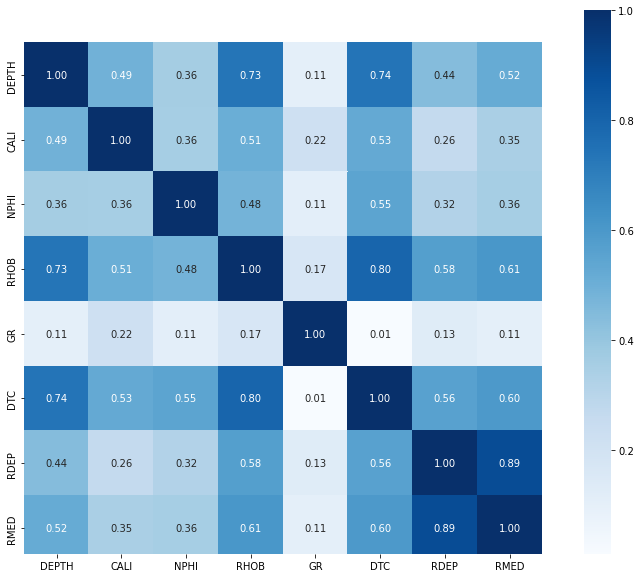

In [ ]:
corrmat_nphi = abs(nphi_data.corr()) # absolute correlation

fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corrmat_nphi, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, cmap='Blues')
ax.set_ylim(len(corrmat_nphi)-0.1, -0.5)

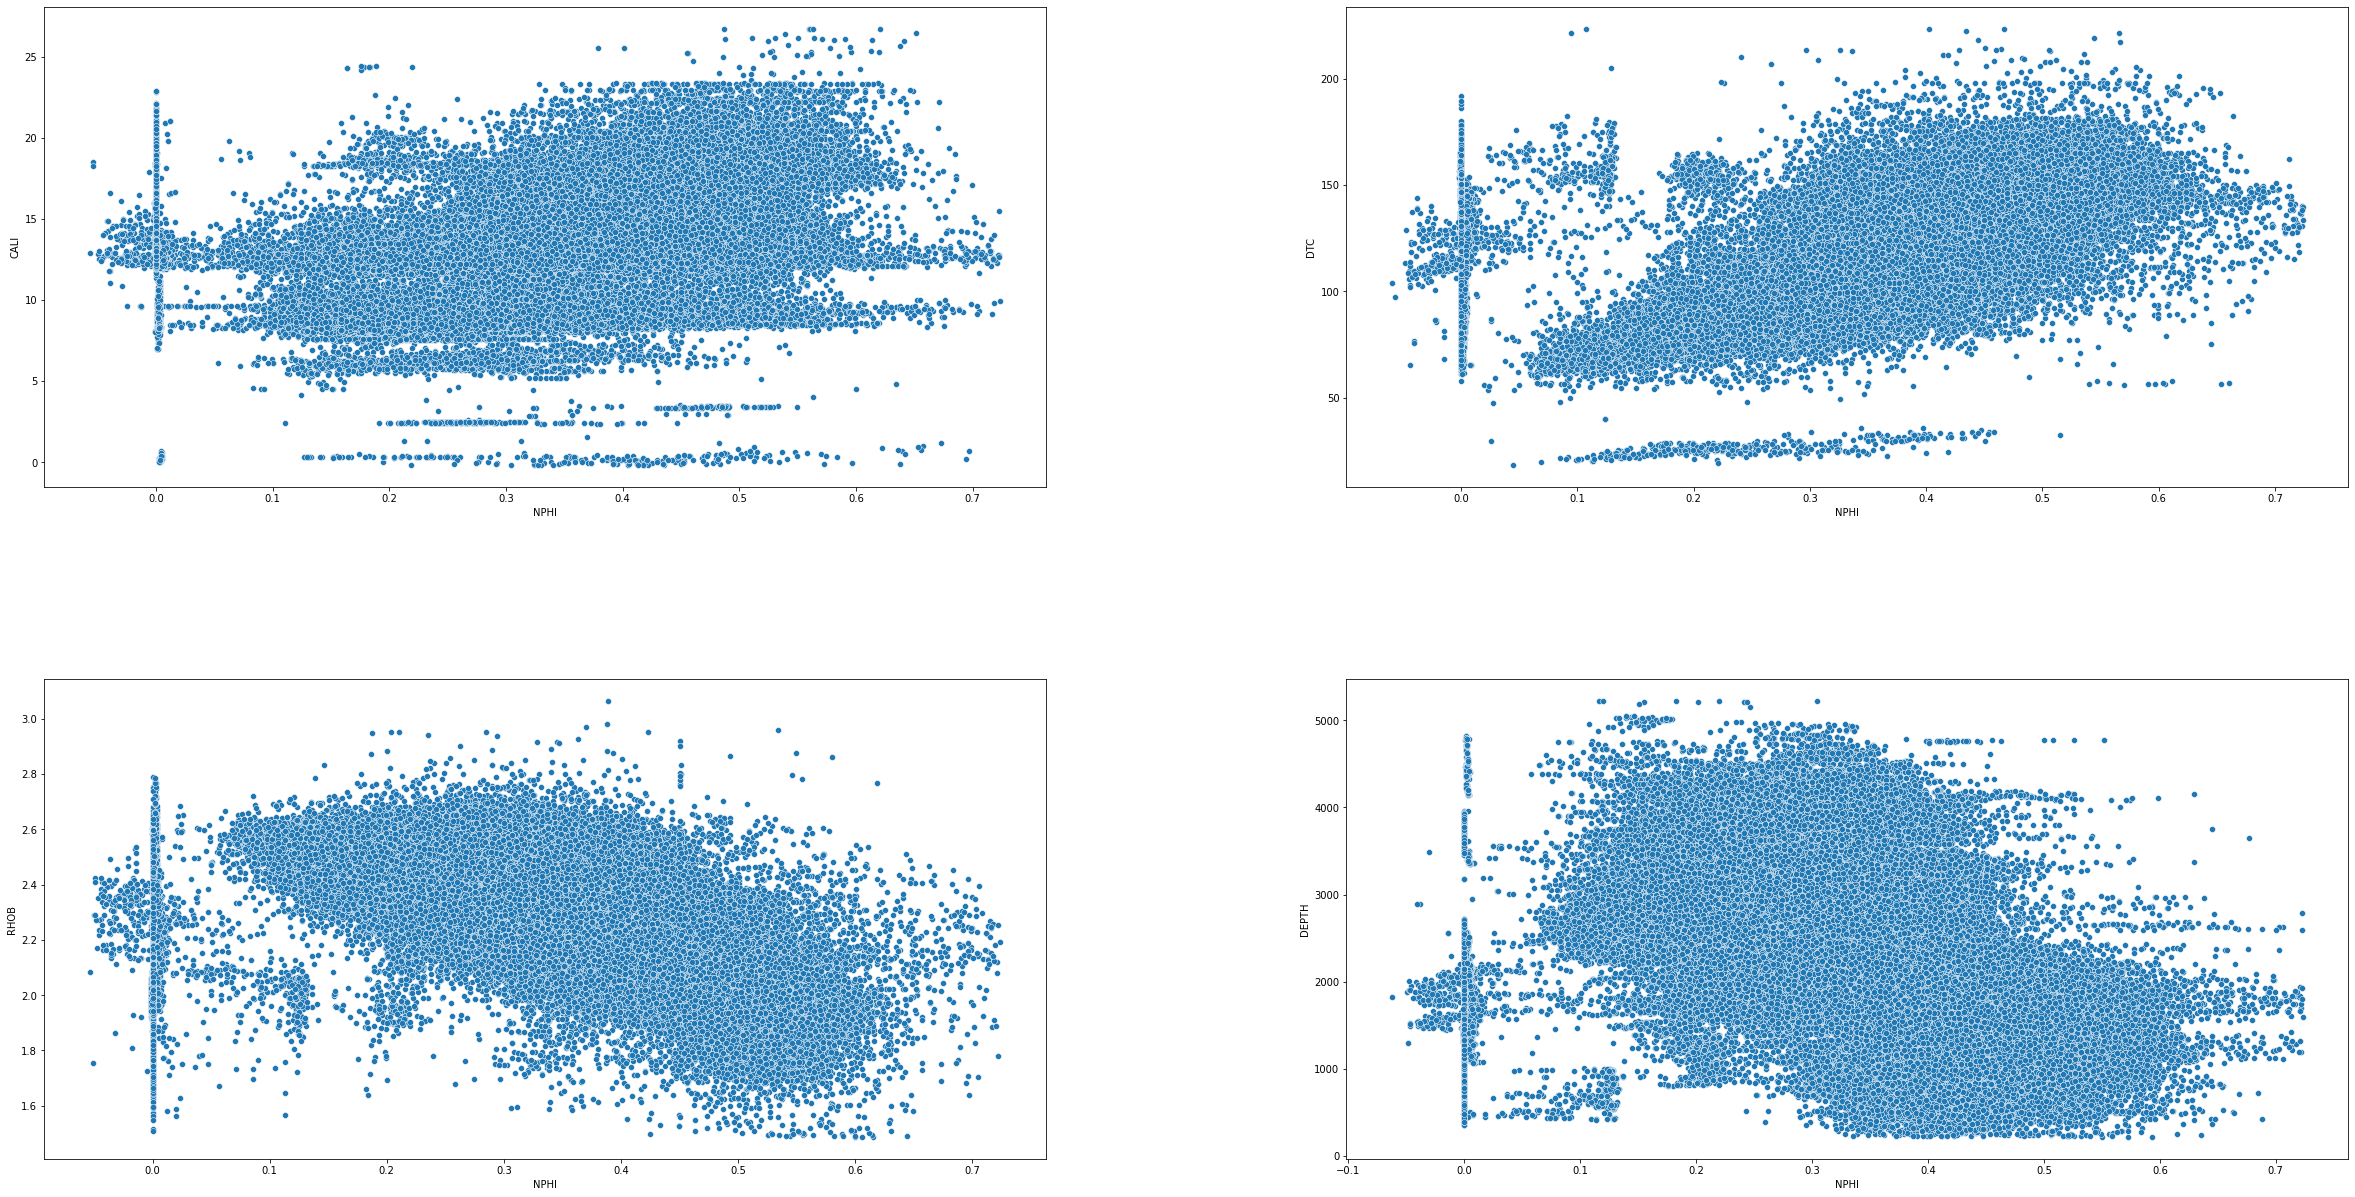

In [ ]:
#Considering the 4 highest correlated variables with NPHI

prior_feat = ['CALI', 'DTC', 'RHOB', 'DEPTH']                   
plt.figure(figsize=(40,20))

for i in range(len(prior_feat)):
  if i<=3:                                                                        #I used this condition to avoid an occuring error
    plt.subplot(2,2,(i+1))
    sns.scatterplot(x="NPHI", y=prior_feat[i], data=nphi_data.sample(100000))
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.4)


plt.show()

CALI: Linear correlation (maybe)<br>
RHOB: negative correlation<br>
DTC: non-linear correlation (exponential)<br>
DEPTH: non-linear correlation (exponential)



---



# Modeling for NPHI prediction

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
!pip install catboost
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, cross_validate, train_test_split

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [ ]:
#Data split

X = nphi_data[['CALI', 'DTC', 'RHOB', 'DEPTH']]
Y = nphi_data['NPHI'].values

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.40, random_state=42)

print(' Training Dataset: ', x_train.shape, y_train.shape)
print(' Test Dataset:  ', x_test.shape, y_test.shape)

 Training Dataset:  (780849, 4) (780849,)
 Test Dataset:   (520566, 4) (520566,)




---



## Model Selection

In [ ]:
# Creating Pipelines of Models                                    (using Robust Scaler due possible presence of Outlier -- Decrease the sensitivity)

#Devided into 2 parts due to ram limitations
linear_pipelines = []
linear_pipelines_2 = []

linear_pipelines.append(  ('ScaledLASSO', Pipeline( [  ('Scaler', RobustScaler()),('LASSO', linear_model.Lasso())  ]     )   )   )
linear_pipelines.append(('ScaledEN', Pipeline([('Scaler', RobustScaler()),('EN', linear_model.ElasticNet())])))
linear_pipelines.append(('ScaledKNN', Pipeline([('Scaler', RobustScaler()),('KNN', KNeighborsRegressor(n_jobs=60))])))
linear_pipelines.append(('ScaledCART', Pipeline([('Scaler', RobustScaler()),('CART', DecisionTreeRegressor())])))
linear_pipelines.append(('ScaledRidge', Pipeline([('Scaler', RobustScaler()),('Ridge', linear_model.Ridge())])))
linear_pipelines.append(('ScaledOMP', Pipeline([('Scaler', RobustScaler()),('OMP', linear_model.OrthogonalMatchingPursuit())])))
linear_pipelines.append(('ScaledBAYRID', Pipeline([('Scaler', RobustScaler()),('BAYRID', linear_model.BayesianRidge())])))
linear_pipelines.append(('ScaledSGD', Pipeline([('Scaler', RobustScaler()),('SGD', linear_model.SGDRegressor())])))

linear_pipelines_2.append(('ScaledRANDOMFOREST', Pipeline([('Scaler', RobustScaler()),('RANDOMFOREST', RandomForestRegressor(n_jobs=60))])))
linear_pipelines_2.append(('ScaledXGB', Pipeline([('Scaler', RobustScaler()),('XGB', XGBRegressor(tree_method='gpu_hist', gpu_id=0))])))
linear_pipelines_2.append(('ScaledCAT', Pipeline([('Scaler', RobustScaler()),('CAT', CatBoostRegressor(verbose=False, task_type='GPU', devices='0-2'))])))
linear_pipelines_2.append(('ScaledLGBM', Pipeline([('Scaler', RobustScaler()),('LGBM', LGBMRegressor(n_jobs=60))])))

In [ ]:
# cross-validation on the level of each model alone, deviding data into 5 splits

results = []
names = []

for name, model in linear_pipelines:

    kfold = KFold(n_splits=5)

    rmse = np.sqrt(-cross_val_score(model, x_train, y_train, cv=kfold, scoring='neg_mean_squared_error'))
    results.append(rmse)
    names.append(name)
    msg = "%s: %f (%f)" % (name, rmse.mean(), rmse.std())
    print(msg)

ScaledLASSO: 0.132590 (0.000225)
ScaledEN: 0.132590 (0.000225)
ScaledKNN: 0.072831 (0.000266)
ScaledCART: 0.083529 (0.000580)
ScaledRidge: 0.109192 (0.000274)
ScaledOMP: 0.110891 (0.000262)
ScaledBAYRID: 0.109192 (0.000274)
ScaledSGD: 0.109230 (0.000289)


In [ ]:
# cross-validation

results = []
names = []

for name, model in linear_pipelines_2:

    kfold = KFold(n_splits=5)

    rmse = np.sqrt(-cross_val_score(model, x_train, y_train, cv=kfold, scoring='neg_mean_squared_error'))
    results.append(rmse)
    names.append(name)
    msg = "%s: %f (%f)" % (name, rmse.mean(), rmse.std())
    print(msg)

ScaledRANDOMFOREST: 0.059154 (0.000212)
[16:11:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:11:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:11:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:11:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:11:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
ScaledXGB: nan (nan)
ScaledCAT: nan (nan)
ScaledLGBM: 0.089473 (0.000347)


⚓ We can see the the RandomForestRegressor shows the best score, so we will fit our data to this model.



---



## Modeling using RandomForestRegressor

In [ ]:
#fitting the model

best_rfr = RandomForestRegressor(n_jobs=60)
best_rfr.fit(RobustScaler().fit_transform(x_train), y_train)

RandomForestRegressor(n_jobs=60)

In [ ]:
y_predict = best_rfr.predict(RobustScaler().fit_transform(x_test))

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('Mean Absolute Error: ', str(mean_absolute_error(y_predict, y_test)), '\n')
print('\n')
print('Root Mean Squared Error: ', str(np.sqrt(mean_squared_error(y_predict, y_test))))

Mean Absolute Error:  0.03814349157530433 



Root Mean Squared Error:  0.06635333828521514




---



# Prediction of NPHI Null values

⚓ So now we're using the most correlated features with NPHI to predict its missing values

In [ ]:
df_main.head(3)

,DEPTH,LITHOLOGY_GEOLINK,CALI,NPHI,RHOB,GR,DTC,RDEP,RMED,WELL_NAME
0,1150.763794,NaN,13.071999,0.463152,1.970,85.510208,95.029999,3.951845,1.696892,35_11-10
1,1150.916260,NaN,13.155000,0.503288,1.951,91.014000,114.057999,2.285331,1.483686,35_11-10
2,1151.068604,NaN,13.819000,0.528165,1.934,101.687447,115.072998,1.652506,1.257905,35_11-10


In [ ]:
df_main['NPHI'].isnull().sum()

728307

In [ ]:
#creating a df of rows having null NPHI values
null_nphi_df = df_main[pd.isnull(df_main['NPHI'])]
#keeping the 4 highly correlated features with NPHI
null_nphi_df = null_nphi_df.drop(columns=['LITHOLOGY_GEOLINK', 'WELL_NAME', 'GR', 'RDEP', 'RMED'])

print(null_nphi_df.shape)
null_nphi_df.head(3)

(728307, 5)


,DEPTH,CALI,NPHI,RHOB,DTC
8127,2875.170166,8.331,NaN,2.323009,82.194229
8128,2875.322510,8.329,NaN,2.325994,82.337769
8129,2875.474853,8.329,NaN,2.323984,82.192436


In [ ]:
#features only
feat_for_pred = null_nphi_df[['CALI', 'DTC', 'RHOB', 'DEPTH']]
feat_for_pred.head(3)

,CALI,DTC,RHOB,DEPTH
8127,8.331,82.194229,2.323009,2875.170166
8128,8.329,82.337769,2.325994,2875.322510
8129,8.329,82.192436,2.323984,2875.474853


In [ ]:
#predicting using the random forest regressor
nphi_prediction = best_rfr.predict(RobustScaler().fit_transform(feat_for_pred))
nphi_prediction

array([0.05308267, 0.05308267, 0.05308267, ..., 0.11998287, 0.11566355,
       0.30922994])



---



# Finalizing the dataframe

In [ ]:
#creating a copy of the null nphi data frame     {CALI	DTC	RHOB	DEPTH}
predicted_nphi_dataset = null_nphi_df

#adding the predicted values of nphi             {CALI	DTC	RHOB	DEPTH + NPHI}
predicted_nphi_dataset['NPHI'] = nphi_prediction

print(predicted_nphi_dataset.shape)
predicted_nphi_dataset.head(3)

(728307, 5)


,DEPTH,CALI,NPHI,RHOB,DTC
8127,2875.170166,8.331,0.053083,2.323009,82.194229
8128,2875.322510,8.329,0.053083,2.325994,82.337769
8129,2875.474853,8.329,0.053083,2.323984,82.192436


In [ ]:
print(nphi_data.shape)
nphi_data.head(3)


(1301415, 8)


,DEPTH,CALI,NPHI,RHOB,GR,DTC,RDEP,RMED
0,1150.763794,13.071999,0.463152,1.970,85.510208,95.029999,3.951845,1.696892
1,1150.916260,13.155000,0.503288,1.951,91.014000,114.057999,2.285331,1.483686
2,1151.068604,13.819000,0.528165,1.934,101.687447,115.072998,1.652506,1.257905


In [ ]:
#combining filled nphi df and the newly filled nphi df
total_df = nphi_data.append(predicted_nphi_dataset)                             # {DEPTH	CALI	NPHI	RHOB	DTC	 GR  RDEP	RMED}                     (1301415, 8)
                                                                                #                     +
                                                                                # {DEPTH	CALI	NPHI	RHOB	DTC}                                    (728307, 5)
total_df.sort_index(inplace=True)

#adding the values of other features
total_df['GR'] = df_main['GR'].values                                           #                                 GR
total_df['RDEP'] = df_main['RDEP'].values                                       #                                    RDEP
total_df['RMED'] = df_main['RMED'].values                                       #                                         RMED

total_df['LITHOLOGY_GEOLINK'] = df_main['LITHOLOGY_GEOLINK'].values

print(total_df.shape)                                                           # {DEPTH	CALI	NPHI	RHOB	DTC	 GR  RDEP	RMED LITHOLOGY_GEOLINK}   (2029722, 9)
total_df.head(n=3)

(2029722, 9)


,DEPTH,CALI,NPHI,RHOB,GR,DTC,RDEP,RMED,LITHOLOGY_GEOLINK
0,1150.763794,13.071999,0.463152,1.970,85.510208,95.029999,3.951845,1.696892,NaN
1,1150.916260,13.155000,0.503288,1.951,91.014000,114.057999,2.285331,1.483686,NaN
2,1151.068604,13.819000,0.528165,1.934,101.687447,115.072998,1.652506,1.257905,NaN


In [ ]:
#saving the final df with filled values of NPHI

path_file_total_df = '/content/gdrive/MyDrive/Dev tools/Data - NorthSea Electrofacies/Generated Dataframes/total_df.csv.gz'
total_df.to_csv(path_file_total_df,index=False, compression='gzip')